<a href="https://colab.research.google.com/github/ashok-lamichhane/Data-Analysis-Visualization-Project/blob/main/Data_Analysis_%26_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install plotly --quiet
!pip install -q pandas-profiling
!pip install -q streamlit

# Import necessary libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
url = 'https://drive.google.com/uc?id=1I1_-aNqZNjgDtYIHDtUCRl9Rj_PLksox'
df = pd.read_csv(url)

# Show top records
df.head()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", 

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


Basic Data Cleaning


In [4]:
# Basic info and missing values
df.info()
df.isnull().sum()

# Convert date if applicable
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.day_name()
    df['Week'] = df['Date'].dt.isocalendar().week

# Checks data structure, missing values, and converts date columns to extract useful info like year, month, weekday, etc.
# This helps break down your spending into meaningful time-based patterns.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [14]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Drop rows where Date couldn't be parsed
df = df.dropna(subset=['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month
monthly_spend = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_spend.columns = ['Year', 'Month', 'Total_Spend']

# Category-wise total spending using 'Product_Category'
category_spend = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)

#his block converts the Date column to proper date format, extracts Year and Month, and removes rows with invalid dates.
#It then creates summary tables showing total spending per month and total spending by product category.

In [13]:
# Time series line chart - Monthly Spending
#It shows the relationship of monthly spending with time that whcih have higer, lower and medium expense

fig1 = px.line(monthly_spend, x='Month', y='Total_Spend', color='Year', title='Monthly Spending Over Years')
fig1.show()

In [16]:
# Pie chart - Spending by Category (From this we can see that in which item the user expense most of his money)
fig2 = px.pie(category_spend, names='Product_Category', values='Amount', title='Spending by Product Category')
fig2.show()

In [17]:

# Bar chart - Average Spend per Weekday (In which weekday the user is must eager to expend the money?)
weekday_avg = df.groupby('Weekday')['Amount'].mean().reset_index()
fig3 = px.bar(weekday_avg.sort_values('Amount', ascending=False), x='Weekday', y='Amount', title='Average Spend by Weekday')
fig3.show()

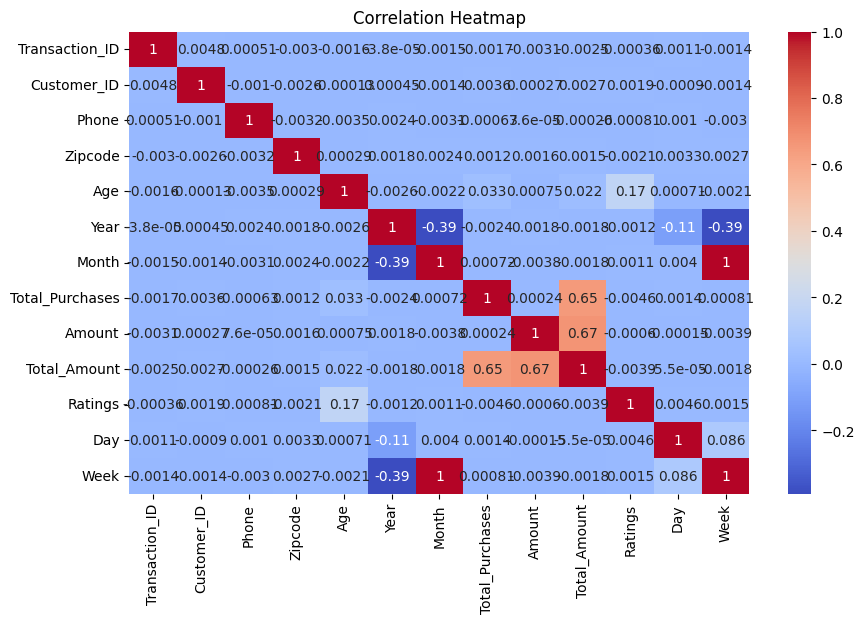

In [19]:
# Correlation Heatmap (if numerical columns exist)
numerical_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Creates a heatmap to see the correlation between numerical features like amount and cumulative spend.
# Helps spot which variables are related to each other.
